In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import enum
import copy
import connect4.connect4 as game
from pympler import asizeof
import deeplearning.buffer as buf
import torch 
import torch.nn as nn
import torch.optim as optim
import deeplearning.mlp as mlp
import torch.nn.functional as F
import picture_maker

In [2]:
name = "model"
agent: mlp.BF = mlp.BF.load(name)  # loads path "data/<name>.pth"
print(agent)

BF(
  (fc1): Linear(in_features=42, out_features=1000, bias=True)
  (commands): Linear(in_features=2, out_features=1000, bias=True)
  (last): Linear(in_features=1000, out_features=7, bias=False)
  (sigmoid): Sigmoid()
)


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


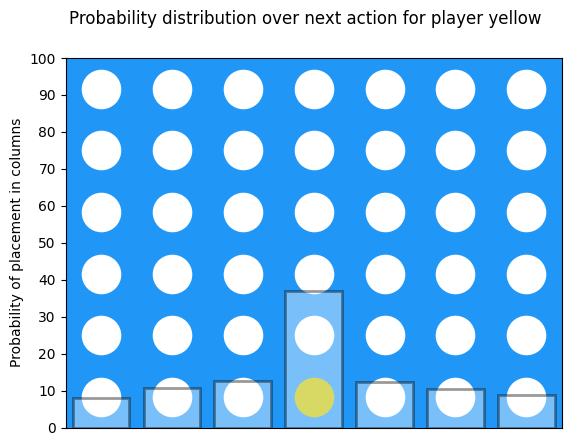

In [7]:
# Set up Test Case 1: Opening move, should place in center
env = game.Connect4()
s = env.reset()
print(s)  # Print initial board state
desire = 1
elo = 1050/1000

win_act_probs = agent.step(s, desire, elo)
next_s, a, done, reward = env.step(win_act_probs)
picture_maker.make_prob_overlay(next_s.astype(int), win_act_probs)

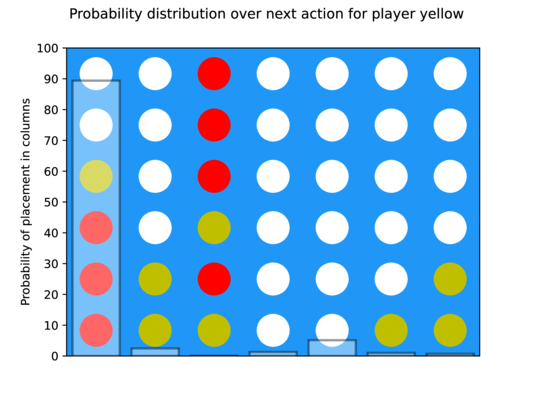

In [21]:
# Test case 2: Block opponent's win, should place in column 1
env.reset()
s = np.array([
    [0, 0, -1, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0, 0],
    [-1, 0, 1, 0, 0, 0, 0],
    [-1, 1, -1, 0, 0, 0, 1],
    [-1, 1, 1, 0, 0, 1, 1]
])
env.board = s  # Set board to test case
desire = 1
elo = 1050/1000

win_act_probs = agent.step(s, desire, elo)
next_s, a, done, reward = env.step(win_act_probs)
picture_maker.make_prob_overlay(next_s.astype(int), win_act_probs)

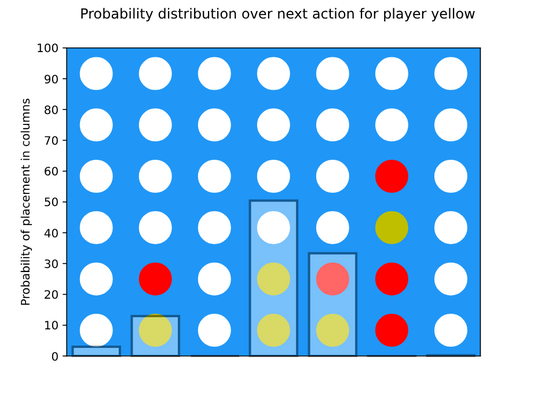

In [24]:
# Test case 3: Take easy win, should place in column 3
env.reset()
s = np.array([
    [ 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0,-1, 0],
    [ 0, 0, 0, 0, 0, 1, 0],
    [ 0,-1, 0, 1,-1,-1, 0],
    [ 0, 1, 0, 1, 1,-1, 0]
])
env.board = s  # Set board to test case
desire = 1
elo = 1050/1000

win_act_probs = agent.step(s, desire, elo)
next_s, a, done, reward = env.step(win_act_probs)
picture_maker.make_prob_overlay(next_s.astype(int), win_act_probs)

In [27]:
# Additional visualiser: Print likelihood of placing in center as ELO increases
s = env.reset()
for elo in range(0, 2000, 100):
    print(elo, agent.steps([s], 1, elo/1000)[0][3])

# Higher elo agents are more likely to place in the center

0 0.26846895
100 0.27926686
200 0.28974313
300 0.30002174
400 0.30987293
500 0.3190514
600 0.3284036
700 0.33759305
800 0.3467969
900 0.35619867
1000 0.36499402
1100 0.37379217
1200 0.38213655
1300 0.3906414
1400 0.39886132
1500 0.40706503
1600 0.41504252
1700 0.42290708
1800 0.43069878
1900 0.4385035
